In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-recommendation/Hotel_Room_attributes.csv
/kaggle/input/hotel-recommendation/Hotel_details.csv
/kaggle/input/hotel-recommendation/hotel_price_min_max - Formula.csv
/kaggle/input/hotel-recommendation/hotels_RoomPrice.csv
/kaggle/input/hotel-reviews-bookingcom/La_Veranda_Reviews-2023-01-16.csv


# Hotel Reccomedation System 

1. EDA - Exploratory 
2. Data Preprocessing
3. Model 
4. Summary

## Import Module and Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#dataframe hotel room attributes
path_hotel_atb = '/kaggle/input/hotel-recommendation/Hotel_Room_attributes.csv'
path_hotel_dt = '/kaggle/input/hotel-recommendation/Hotel_details.csv'
path_hotel_rp = '/kaggle/input/hotel-recommendation/hotel_price_min_max - Formula.csv'


df_hotel_atb = pd.read_csv(path_hotel_atb)
df_hotel_dt = pd.read_csv(path_hotel_dt)
df_hotel_rp = pd.read_csv(path_hotel_rp)

## EDA - Exploratory Data Analysis

In [4]:
df_hotel_atb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [5]:
df_hotel_atb.head(10)

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
5,50650319,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
6,50650320,7975,Air conditioning: ;Clothes rack: ;Heating: ;In...,Deluxe Triple Room,"Shower, 1 single bed and 1 double bed"
7,50650321,7975,Air conditioning: ;Clothes rack: ;Heating: ;In...,Deluxe Triple Room,"Shower, 1 single bed and 1 double bed"
8,50677498,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
9,50677499,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Deluxe Double Room with Shower,"Room size: 17 m²/183 ft², Shower, 1 queen bed ..."


In [6]:
df_hotel_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [7]:
df_hotel_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hotelcode  9094 non-null   int64  
 1   min        9094 non-null   float64
 2   max        9094 non-null   float64
 3   Diff_Min   9094 non-null   float64
 4   Diff_Max   9094 non-null   float64
 5   Score      9094 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 426.4 KB


In [8]:
df_hotel_rp.head(10)

,hotelcode,min,max,Diff_Min,Diff_Max,Score
0,31,75.10,189.88,0.000,0.000,0.00
1,97,259.76,400.00,1.103,0.712,0.91
2,834,220.67,656.86,0.786,1.124,0.95
3,3144,254.54,347.30,0.886,0.395,0.64
4,11203,230.91,244.58,0.748,0.149,0.45
5,383,78.40,180.56,0.018,0.028,0.02
6,162,123.16,371.71,0.271,0.532,0.40
7,287,75.10,189.88,0.000,0.000,0.00
8,333,46.80,46.80,0.187,0.490,0.34
9,378,235.16,951.90,1.001,2.129,1.56


In [9]:
df_hotel_dt.head(5)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


## Recommendation System - Knowledge-base Filterings


Recommdation System มีหลักใหญ่ๆ 
* Content-based filtering
    ระบบที่ใช้ algorithm นี้จะแนะนำสินค้าใหม่ ตามคุณลักษณะของสินค้าเดิมที่ลูกค้าเคยเลือก (user profile) ก็จะเหมาะกับในกรณีที่เรามีข้อมูลคุณลักษณะของสินค้า แต่ยังไม่มีข้อมูลความชอบของลูกค้า
   
*  Collaborative filtering ระบบแบบนี้มีสมมติฐานว่ากลุ่มคนที่เคยชอบสินค้ากลุ่มหนึ่งเหมือนๆ กันน่าจะมีรูปแบบความชอบที่เหมือนกัน ก็จะแนะนำสินค้าตามที่กลุ่มนั้นๆ เคยซื้อมาให้ ระบบนี้จะเหมาะกับกรณีที่เรามีข้อมูลความชอบของลูกค้ามาแล้ว

* Knowledge-Based Filtering แนะนำตามตัวเลือก

* Hybrid recommender systems ก็เป็นการรวมระบบรูปแบบต่างๆ เข้าด้วยกัน 

> ในที่นี้ เลือกใช้ Knowledge filtering เนื่องจาก data มีลักษณะมี score มาอยู่แล้ว

#ref : https://medium.com/botnoi-classroom/data-science-essential-week-7-recommendation-system-%E0%B8%AA%E0%B8%A3%E0%B8%B8%E0%B8%9B%E0%B9%80%E0%B8%99%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%AB%E0%B8%B2-c8402549399c


In [10]:
df_hotel_dt.shape

(108048, 14)

In [11]:
df_hotel_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


## Data Preprocessing

In [12]:
def clean_df(df):
    column_to_drop = ['id','hotelid','zipcode','Source','url']
    df = df.drop(columns = column_to_drop)
    
    return df

In [13]:
df = clean_df(df_hotel_dt)

df.head(10)

,hotelname,address,city,country,propertytype,starrating,latitude,longitude,curr
0,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,Holiday parks,4,43.440124,16.682505,EUR
1,Hotel Polonia,Plac Teatralny 5,Torun,Poland,Hotels,3,53.012329,18.603800,EUR
2,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,Hotels,3,46.477920,11.813350,EUR
3,Madalena Hotel,Mykonos,Mykonos,Greece,Hotels,3,37.452316,25.329849,EUR
4,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,Hotels,3,46.682780,11.131736,EUR
5,Boutique Hotel Three Lilies,Narodni 3,Frantiskovy Lazne,Czech Republic,Hotels,4,50.118496,12.349790,EUR
6,MPM Hotel Sport,"100, Pirin Str",Bansko,Bulgaria,Hotels,4,41.824789,23.477644,BGN
7,Family Hotel Santo Bansko,6 St.Ivan Rilski Str,Bansko,Bulgaria,Hotels,3,41.829603,23.481450,BGN
8,Villas Jagoda & Malina,Borovets,Borovets,Bulgaria,Holiday parks,3,42.275284,23.618516,BGN
9,Hotel Silver,"10,Lozengrad",Sozopol,Bulgaria,Hotels,3,42.417956,27.699371,BGN


In [14]:
df.country.unique()

array(['Croatia', 'Poland', 'Italy', 'Greece', 'Czech Republic',
       'Bulgaria', 'France', 'Netherlands', 'Austria', 'Romania', 'Malta',
       'Germany', 'Switzerland', 'Denmark', 'Finland', 'Ireland', 'Spain',
       'United Kingdom', 'Latvia', 'Portugal', 'Slovenia', 'Cyprus',
       'Belgium', 'Sweden', 'Hungary', 'Slovakia', 'Lithuania',
       'Luxembourg', 'Estonia'], dtype=object)

Text(0.5, 1.0, 'Number of hotel each country')

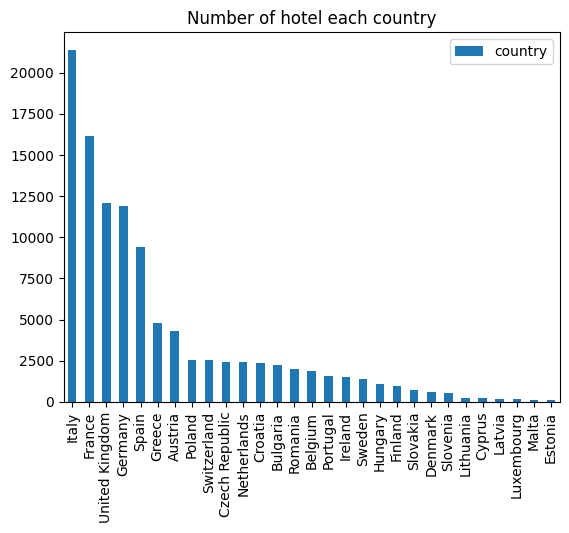

In [15]:
df['country'].value_counts().plot.bar()
plt.legend()
plt.title('Number of hotel each country')

In [27]:
#filter hotel in italy or else
def filter_country(df,country):
    if type(country) == list:   
        df_filter = df[df['country'].isin(country)]
    else:  
        df_filter = df[df['country']== country]
        
    df_filter = df_filter.sort_values(by = 'starrating',ascending = False)
    return df_filter

In [29]:
df_france = filter_country(df,'France')

df_france.head(10)

,hotelname,address,city,country,propertytype,starrating,latitude,longitude,curr
68561,Hotel Astra Opera - Astotel,29 rue Caumartin,Paris,France,Hotels,4,48.871798,2.328088,EUR
97713,Best Western Le Patio Des Artistes,6 Rue de Bone,Cannes,France,Hotels,4,43.552250,7.028230,EUR
68288,Villa Lutece Port Royal,52 rue Jenner,Paris,France,Hotels,4,48.836267,2.360196,EUR
68286,Maison Malesherbes,"11, place de Saint-Augustin",Paris,France,Hotels,4,48.875562,2.318822,EUR
68285,Mercure Lille Centre Vieux Lille,27 rue des Tours,Lille,France,Hotels,4,50.641738,3.066596,EUR
68274,Courtyard Toulouse Airport,"4Bis, Rue Alain Fournier",Toulouse,France,Hotels,4,43.607494,1.370828,EUR
68262,Le Camping les Champs Blancs,76 Route de Rochelongue,Agde,France,Campsites,4,43.296816,3.475125,EUR
68239,Saint James Albany Paris Hotel Spa,"202, rue de Rivoli",Paris,France,Hotels,4,48.864223,2.330758,EUR
68235,Residence Le Bois Flotte,71-73 route de Cabourg,Merville-Franceville-Plage,France,Holiday parks,4,49.282644,-0.192619,EUR
68229,BEST WESTERN PLUS CANNES RIVIERA,"16, boulevard dAlsace",Cannes,France,Hotels,4,43.554364,7.020736,EUR


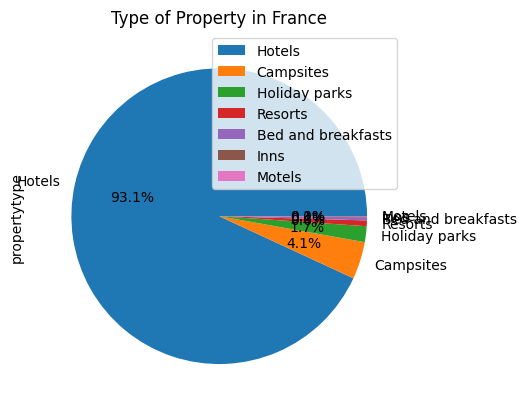

In [53]:
#property type in france
df_france['propertytype'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Type of Property in France')
plt.legend()

Text(0.5, 1.0, 'Rating Score in France')

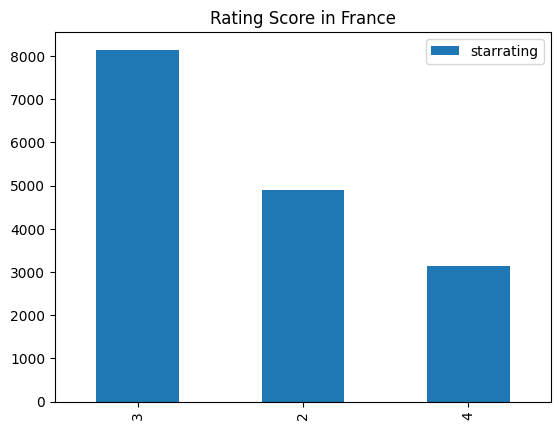

In [36]:
#plot hotel in france  star rating
df_france['starrating'].value_counts().plot.bar()
plt.legend()
plt.title('Rating Score in France')

In [39]:
#filter by city
def filtered_city(df,city):
    city = df[df['city']==city.lower()]
    city = city.sort_values(by='starrating',ascending=False)
    city.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    if(city.empty==0):
        return city
    else:
        print('No Hotels Available')

In [40]:
filtered_city(df,'Paris')

No Hotels Available


In [19]:
#another dataset
df_la = pd.read_csv('/kaggle/input/hotel-reviews-bookingcom/La_Veranda_Reviews-2023-01-16.csv')

df_la.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


In [20]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    435 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   object 
 8   VisitDate         1523 non-null   object 
 9   GroupType         1523 non-null   object 
 10  PropertyResponse  123 non-null    object 
dtypes: float64(1), object(10)
memory usage: 131.0+ KB


In [21]:
df_la.describe()

,Score
count,1523.000000
mean,8.973802
std,1.300178
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


## Data Preprocessing 

In [77]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.patches as mpatches

neutral_sentence =  'neutral'

def text_cleaner(text): # Remove square brackets, punctuation and numbers
    if not isinstance(text, float):
        text = text.lower()
        text = text.replace('\n', ' ')
        text = re.sub('\[.*?\]','',text) 
        text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
        text = re.sub('\w*\d\w*','',text)
        text = re.sub('[‘’“”…]','',text)
    else:
        text = neutral_sentence
    return text

cleaner = lambda x: text_cleaner(x)

def analyze_sentiment(clean_text):
    score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
    if score['pos'] > score['neg']: return 1
    else: return 0
    
analyzer = lambda x: analyze_sentiment(x)

In [75]:
#clean data
df_la['cleaned_Title'] = pd.DataFrame(df_la['Title'].apply(cleaner))
df_la['sentiment_Title'] = pd.DataFrame(df_la['cleaned_Title'].apply(analyzer))

In [78]:
def sentiment_analysis(df):
    #countplot - bar
    sns.countplot(x = 'sentiment_Title', data=df, palette= ["#7fcdbb","#87CEEB"])
    plt.ylabel('Number')
    plt.xlabel('Sentiment')
    #define color
    red_patch = mpatches.Patch(color='#7fcdbb', label='Negative')
    blue_patch = mpatches.Patch(color='#00FF00', label='Positive')
    #other arttributes
    plt.legend(handles=[red_patch, blue_patch], title='Review', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.yticks(df['sentiment_Title'].value_counts())
    plt.title('Count of Positive and Negative review titles',fontsize = 12, y= 1.03)
    plt.show()

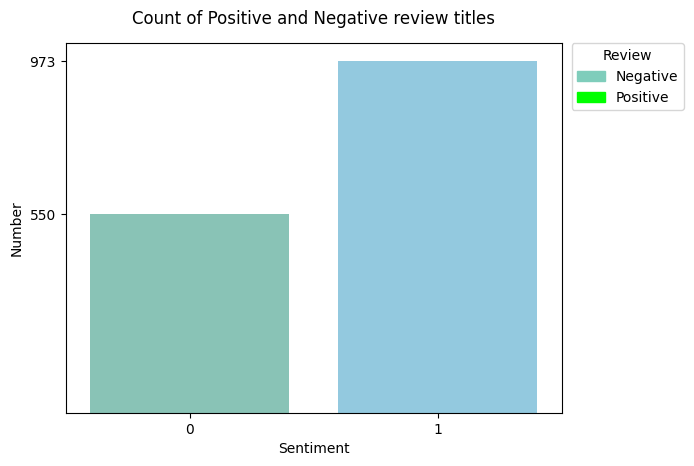

In [104]:
sentiment_analysis(df_la)

In [82]:
#top 10 score country guest
top_10_countrys_score = df_la.groupby('GuestCountry')['Score'].agg(['count','mean']).sort_values(by='count',ascending=False).reset_index()[:10]
top_10_countrys_score

,GuestCountry,count,mean
0,United Kingdom,239,8.960669
1,Cyprus,183,8.792350
2,Israel,133,9.120301
3,France,97,9.047423
4,Germany,91,8.835165
5,Russia,75,9.212000
6,Ukraine,62,9.064516
7,Greece,53,9.056604
8,United States of America,44,9.000000
9,Italy,41,8.341463


Text(0.5, 1.0, 'Top 10 Guest Countrys')

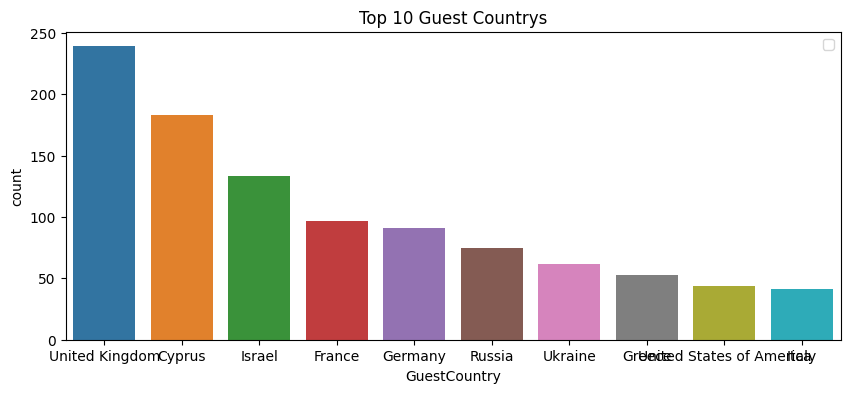

In [100]:
#visulize most guest country
plt.figure(figsize=(10,4))
sns.barplot(data = top_10_countrys_score,x='GuestCountry',y = 'count')
plt.legend()
plt.title('Top 10 Guest Countrys')

In [105]:
df_la.head(10)

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,cleaned_Title,sentiment_Title
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN,wonderful place to stay,1
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN,it was superb,1
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN,very good,1
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN,wonderful,1
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN,fantastic value for a new modern and spotless ...,1
5,Wonderful,We only stayed over night before heading to th...,NaN,9.0,Kim,United Kingdom,Double Room with Balcony,1 night,December 2022,Couple,NaN,wonderful,1
6,lovely stop over,great,NaN,8.0,Emma,United Kingdom,Two-Bedroom Suite,1 night,October 2022,Family,NaN,lovely stop over,1
7,great place for few days to stay,"nice location, lovely personal, renovated,",nothing,10.0,Yuriy,Cyprus,Double Room,1 night,November 2022,Couple,NaN,great place for few days to stay,1
8,such helpful hosts.helped us with map .helps w...,couldn't eat breakfast due to dietary restrict...,maybe possibility of purchasing fresh fruit or...,10.0,Hanna,Israel,Double Room,1 night,November 2022,Family,NaN,such helpful hostshelped us with map helps wit...,1
9,Great overnight stay before a flight.,Great modern room comfortable bed and quiet lo...,NaN,10.0,Nicholas,United Kingdom,Double Room,1 night,December 2022,Solo traveler,NaN,great overnight stay before a flight,1


In [106]:
#room type score
def plot_type_score(df):
    plt.figure(figsize= (10,6))
    roomType_vs_Score = df.groupby('RoomType')['Score'].mean().sort_values().reset_index().set_index('RoomType')
    g = roomType_vs_Score.plot(kind='barh', colormap='Paired', legend=False)
    plt.xlim(8, 10)
    plt.xticks([])
    plt.yticks(fontsize=12)
    plt.ylabel('')
    plt.title('Type of room by mean score',fontsize = 15, y= 1.02)
    for i in range(len(roomType_vs_Score)):
        g.text(roomType_vs_Score.iloc[i, 0] + 0.03, i,str(round(roomType_vs_Score.iloc[i, 0],2)), fontdict = dict(color='black', fontsize=12), horizontalalignment='left')
    plt.show()

<Figure size 1000x600 with 0 Axes>

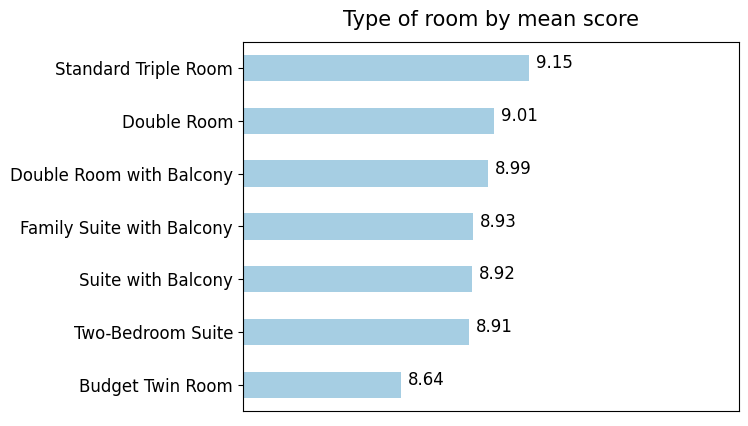

In [107]:
plot_type_score(df_la)

In [112]:
df_la['NumberOfNights'].value_counts()

1 night      1151
2 nights      142
3 nights       92
4 nights       57
7 nights       35
5 nights       15
9 nights       10
6 nights        5
14 nights       4
11 nights       3
8 nights        3
12 nights       2
10 nights       2
16 nights       1
15 nights       1
Name: NumberOfNights, dtype: int64

In [119]:
#จำนวนที่ guest พักอยู่่กี่คืนเป็นจำนวนเท่าไหร่
def plot_num_night(df):
    plt.figure(figsize=(10,4))
    plt.title('Count number of night',fontsize = 15)
    df['NumberOfNights'].value_counts(ascending=True).plot.barh()
    plt.show()

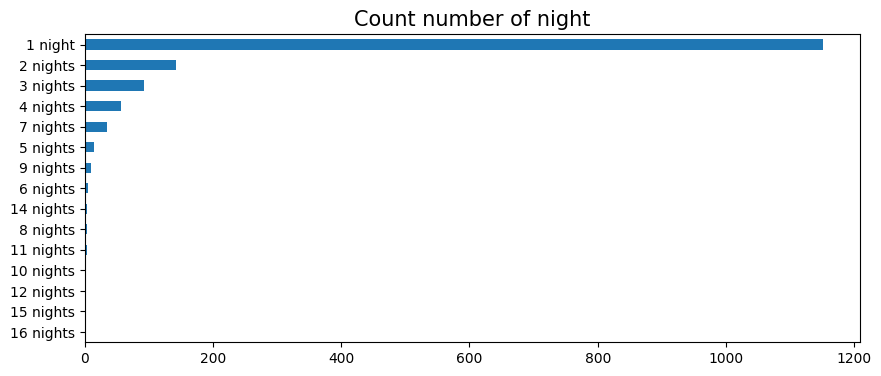

In [120]:
plot_num_night(df_la)

In [124]:
#top 10 guest_country day
def clean_text_night(df):
    df['NumberOfNights'] = df['NumberOfNights'].str.split(expand=True).iloc[:,0]
    df['NumberOfNights'] = df['NumberOfNights'].astype('int8')
    
    return df

df_la = clean_text_night(df_la)

In [128]:
#number night of booking type
top_10_countrys_day = df_la.groupby('GroupType')['NumberOfNights'].agg(['sum','mean','count','max']).sort_values(by='sum',ascending=False).reset_index()
top_10_countrys_day

,GroupType,sum,mean,count,max
0,Couple,900,1.679104,536,12
1,Solo traveler,681,1.724051,395,15
2,Family,670,1.614458,415,14
3,Group,316,1.785311,177,16


## Time Series Analyze

In [131]:
df_la.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,cleaned_Title,sentiment_Title
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1,June 2022,Solo traveler,NaN,wonderful place to stay,1
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3,December 2022,Family,NaN,it was superb,1
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1,December 2022,Solo traveler,NaN,very good,1
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2,September 2022,Solo traveler,NaN,wonderful,1
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1,October 2022,Family,NaN,fantastic value for a new modern and spotless ...,1


In [225]:
date_visit = pd.pivot_table(df_la, values='NumberOfNights', index='VisitDate', columns='GroupType', fill_value = 0, aggfunc='sum')

date_visit

GroupType,Couple,Family,Group,Solo traveler
VisitDate,,,,
2021-05-01,1,0,0,3
2021-06-01,16,11,19,20
2021-07-01,42,52,22,37
2021-08-01,73,51,37,53
2021-09-01,72,37,25,59
2021-10-01,89,40,18,32
2021-11-01,30,24,7,21
2021-12-01,13,3,2,17
2022-01-01,10,4,3,2


In [217]:
date_visit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-05-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Couple         20 non-null     int64
 1   Family         20 non-null     int64
 2   Group          20 non-null     int64
 3   Solo traveler  20 non-null     int64
dtypes: int64(4)
memory usage: 800.0 bytes


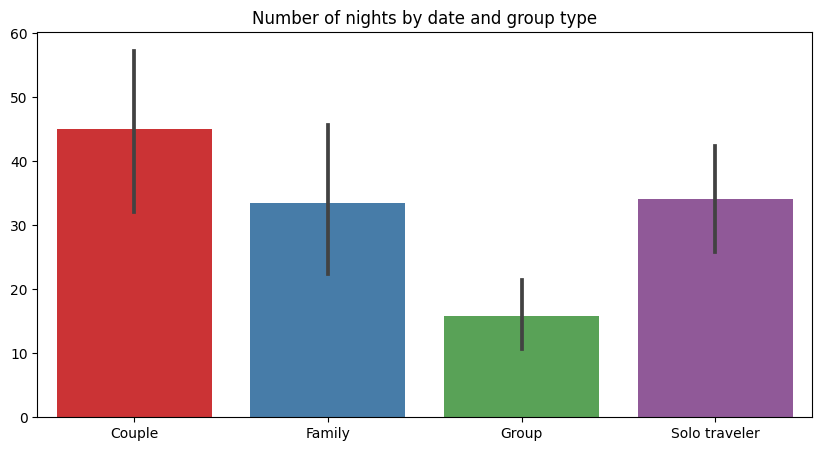

In [218]:
#visulize time series 
plt.figure(figsize = (10,5))
sns.barplot(data=date_visit, palette='Set1', linewidth=3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.title('Number of nights by date and group type',fontsize = 12)
plt.show()

In [223]:
#transfrom dataframe
date_visit.reset_index(inplace=True)

In [228]:
date_visit_type_sorted = date_visit.copy()

In [229]:
date_visit_type_sorted

GroupType,Couple,Family,Group,Solo traveler
VisitDate,,,,
2021-05-01,1,0,0,3
2021-06-01,16,11,19,20
2021-07-01,42,52,22,37
2021-08-01,73,51,37,53
2021-09-01,72,37,25,59
2021-10-01,89,40,18,32
2021-11-01,30,24,7,21
2021-12-01,13,3,2,17
2022-01-01,10,4,3,2


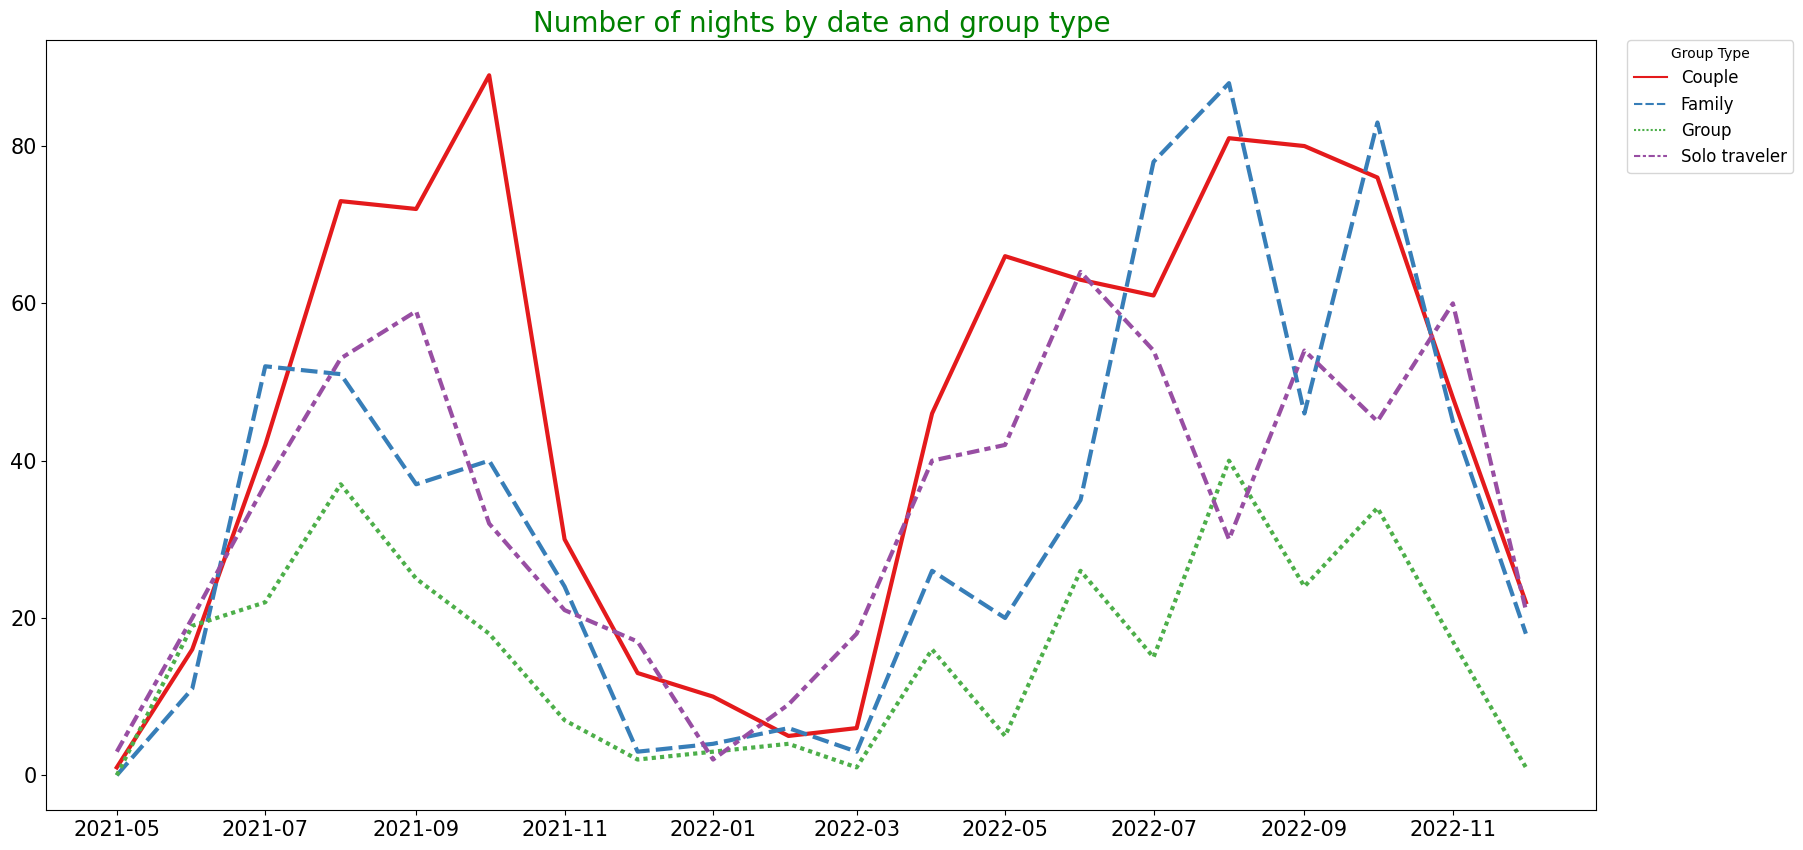

In [230]:
#plot timesiries
plt.rcParams["figure.figsize"] = [20.00, 10.00]
sns.lineplot(data=date_visit, palette='Set1', linewidth=3)
plt.legend(title='Group Type',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.title('Number of nights by date and group type',fontsize = 20, color="green")
plt.show()

**การทดสอบ Stationary**
>     เราจำเป็นต้องทำให้ข้อมูลเป็น Stationary หรือมีความนิ่ง เนื่องจากคำว่า ‘Auto Regressive’ ใน ARIMA หมายถึงเป็นรูปแบบการถดถอยเชิงเส้นที่ใช้ความล่าช้าของตัวเองเป็นตัวทำนาย ARIMA แบบจำลองการถดถอยเชิงเส้นเหมือนแบบจำลองเชิงเส้นทั่วไปคือทำงานได้ดีเมื่อตัวพยากรณ์ไม่สัมพันธ์และเป็นอิสระจากกัน

In [237]:
date_visit_type_sorted['Total Sum'] = date_visit_type_sorted['Couple'] +\
                                    date_visit_type_sorted['Family'] +\
                                    date_visit_type_sorted['Group'] +\
                                    date_visit_type_sorted['Solo traveler']  

In [253]:
date_visit_type_sorted

GroupType,Couple,Family,Group,Solo traveler,Total Sum
VisitDate,,,,,
2021-05-01,1,0,0,3,4
2021-06-01,16,11,19,20,66
2021-07-01,42,52,22,37,153
2021-08-01,73,51,37,53,214
2021-09-01,72,37,25,59,193
2021-10-01,89,40,18,32,179
2021-11-01,30,24,7,21,82
2021-12-01,13,3,2,17,35
2022-01-01,10,4,3,2,19


## import statistic module

In [263]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
#prophet
from prophet import Prophet

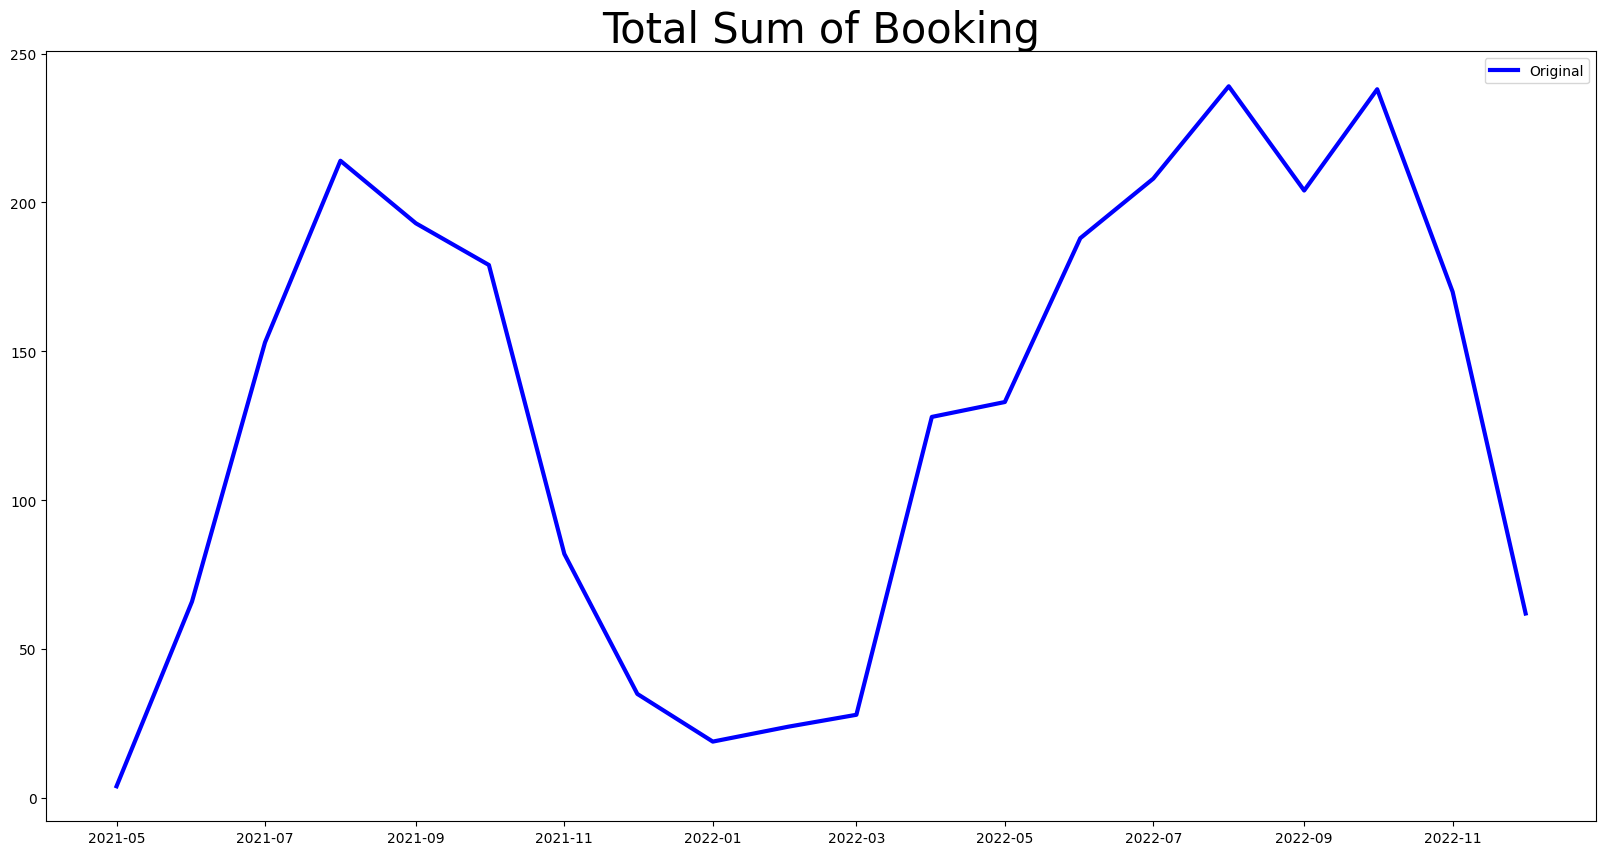

Results of dickey fuller test
Test Statistics                -1.355640
p-value                         0.603349
No. of lags used                8.000000
Number of observations used    11.000000
critical value (1%)            -4.223238
critical value (5%)            -3.189369
critical value (10%)           -2.729839
dtype: float64


In [276]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',linewidth=3,label='Original')
    plt.legend(loc='best')
    plt.title('Total Sum of Booking',fontsize =30)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(date_visit_type_sorted['Total Sum'])

> p-values จากค่านี่เป็นสถิติการทดสอบมีค่าน้อยกว่าค่าวิกฤติ critical values(ค่าลบมากกว่า) หรืออยู่ในขอบเขตการปฏิเสธ คุณสามารถปฏิเสธสมมติฐานว่างของการไม่คงที่และสรุปได้ว่าอนุกรมนั้นคงที่ อย่างไรก็ตาม ในกรณีนี้ สถิติการทดสอบไม่ต่ำกว่าค่าวิกฤต ซึ่งบ่งชี้ว่ามีหลักฐานไม่เพียงพอที่จะปฏิเสธสมมติฐานว่างของการไม่คงที่ ดังนั้น จากผลลัพธ์อนุกรมเวลาจึงมีแนวโน้มไม่คงที่

In [261]:
#dataframe for prophet
df_pp = date_visit_type_sorted.reset_index()

df_pp

GroupType,VisitDate,Couple,Family,Group,Solo traveler,Total Sum
0,2021-05-01,1,0,0,3,4
1,2021-06-01,16,11,19,20,66
2,2021-07-01,42,52,22,37,153
3,2021-08-01,73,51,37,53,214
4,2021-09-01,72,37,25,59,193
5,2021-10-01,89,40,18,32,179
6,2021-11-01,30,24,7,21,82
7,2021-12-01,13,3,2,17,35
8,2022-01-01,10,4,3,2,19
9,2022-02-01,5,6,4,9,24


In [262]:
#ds , y features 
df_pp = df_pp[["VisitDate","Total Sum"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df_pp = df_pp.rename(columns = {"VisitDate":"ds","Total Sum":"y"}) #renaming the columns of the dataset

df_pp

GroupType,ds,y
0,2021-05-01,4
1,2021-06-01,66
2,2021-07-01,153
3,2021-08-01,214
4,2021-09-01,193
5,2021-10-01,179
6,2021-11-01,82
7,2021-12-01,35
8,2022-01-01,19
9,2022-02-01,24


In [264]:
from prophet import Prophet
model = Prophet(daily_seasonality = True) # the Prophet class (model)
model.fit(df_pp) # fit the model using all data

07:59:31 - cmdstanpy - INFO - Chain [1] start processing
07:59:31 - cmdstanpy - INFO - Chain [1] done processing


In [267]:
def plot_forecast(model,day:int):
    future = model.make_future_dataframe(periods=day) 
    prediction = model.predict(future)
    model.plot(prediction)
    plt.title("Prediction of Number of Booking using the Prophet")
    plt.xlabel("Date Time")
    plt.ylabel("Number of Booking")
    plt.show()
    

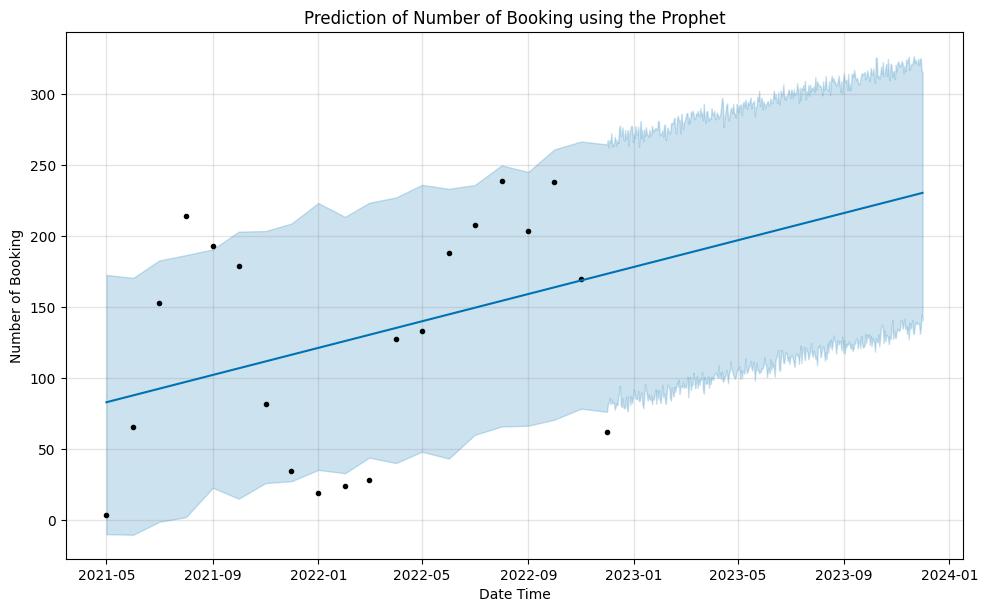

In [268]:
plot_forecast(model,day = 365)